# <center>Covid Fake News Analysis</center>

### Data Ingestion

Dataset Link: https://www.kaggle.com/datasets/arashnic/covid19-fake-news

I have combined the fake news and real news into a single dataset withe some preprocessing done on it.

In [17]:
import pandas as pd
data = pd.read_excel('Constraint_Train.xlsx')
data

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


### Describing the data

In [18]:
data.describe()

,id
count,6420.000000
mean,3210.500000
std,1853.438696
min,1.000000
25%,1605.750000
50%,3210.500000
75%,4815.250000
max,6420.000000


### Preprocessing the dataset

In [19]:
data.set_index('id',inplace=True)

### Checking whether the data has null values

In [20]:
for i in data.columns:
    print(f'{i} has {data[i].isnull().sum()} null values')

tweet has 0 null values
label has 0 null values


### Natural language processing on the text data

In [24]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = stopwords.words('english')

In [25]:
ps = PorterStemmer()
tf = TfidfVectorizer(max_features=73,ngram_range=(1,3))
def parser(text):
    string_manipulation = re.sub("[^a-zA-Z]+",' ',string=str(text)).lower().split()
    string_manipulation = [ps.stem(words) for words in string_manipulation if words not in stopwords]
    string_manipulation = ' '.join(string_manipulation)
    return string_manipulation

In [26]:
data['tweet'] = data['tweet'].apply(parser)
data['label'] = data['label'].replace(['fake','real'],[0,1])

Now the data label values will be changed as Fake:0 and Real:1

### Analysing the words

In [27]:
fake_news = data[data.label==0]
real_news = data[data.label==1]

In [28]:
fake_words_repeated = dict()
for i in fake_news.tweet:
    i = i.split()
    f = FreqDist(i)
    for i,j in f.most_common(14):
        if (j>4):
            fake_words_repeated[i] = j
fake_words_repeated = dict(sorted(fake_words_repeated.items(), key=lambda x:x[1]))

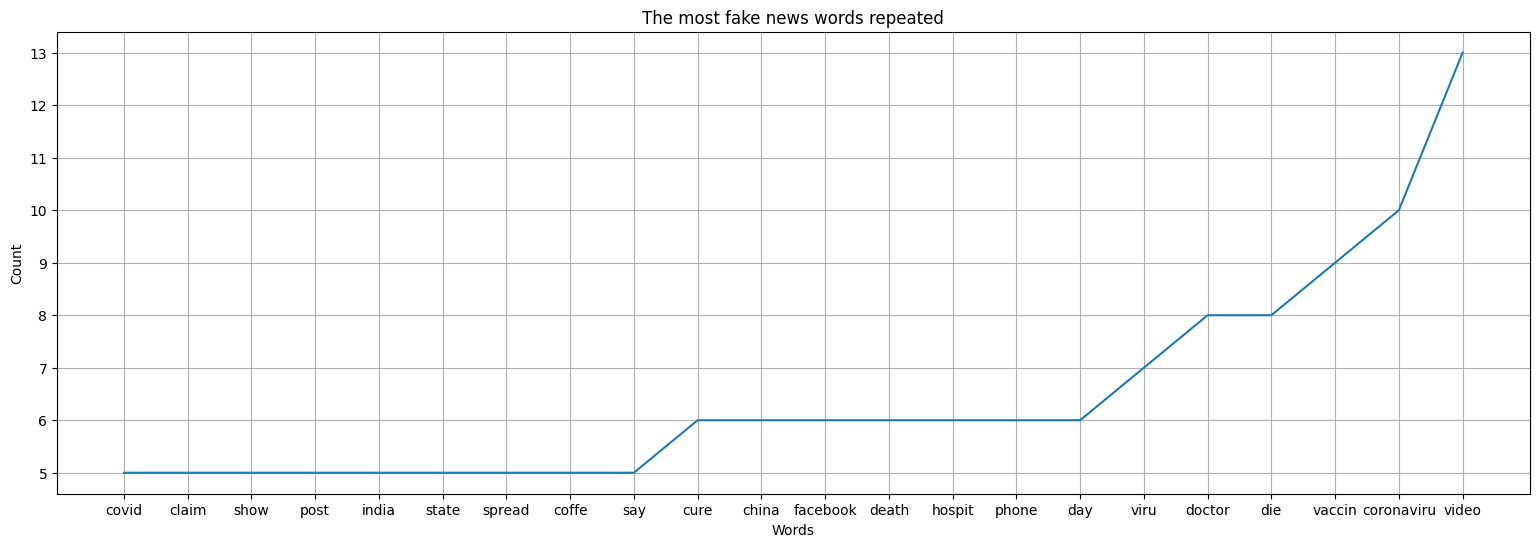

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(19,6))
plt.plot(fake_words_repeated.keys(),fake_words_repeated.values())
plt.title('The most fake news words repeated')
plt.xlabel('Words')
plt.ylabel('Count')
plt.grid()
plt.show()

In [30]:
real_words_repeated = dict()
for i in real_news.tweet:
    i = i.split()
    f = FreqDist(i)
    for i,j in f.most_common(14):
        if (j>4):
            real_words_repeated[i] = j
real_words_repeated = dict(sorted(real_words_repeated.items(), key=lambda x:x[1]))

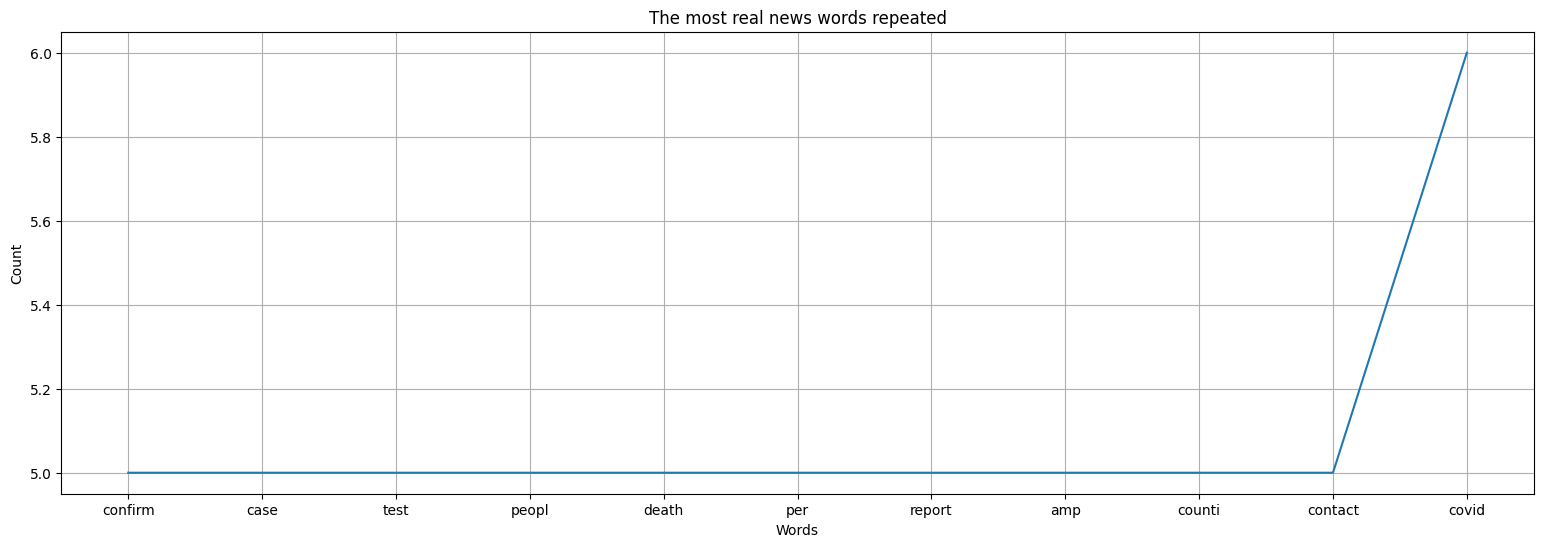

In [31]:
plt.figure(figsize=(19,6))
plt.plot(real_words_repeated.keys(),real_words_repeated.values())
plt.title('The most real news words repeated')
plt.xlabel('Words')
plt.ylabel('Count')
plt.grid()
plt.show()

In [32]:
wc_f = WordCloud(stopwords= stopwords, width=1000,height=1000).generate(' '.join(fake_words_repeated.keys()))
wc_f.to_file('Fake news Word cloud.jpg')
wc_r = WordCloud(stopwords= stopwords, width=1000,height=1000).generate(' '.join(real_words_repeated.keys()))
wc_r.to_file('Real news Word cloud.jpg')
plt.show()

### Fake news word cloud

![Fake news Word cloud.jpg](attachment:7b563416-a204-4fa7-b61e-c53a9dbd3c93.jpg)

### Real news word cloud

![Real news Word cloud.jpg](attachment:be571f67-04c4-4d8a-9863-7c147fad908f.jpg)

### Independent and the dependent variable

In [33]:
X = data['tweet']
X = tf.fit_transform(X)
y = data['label']

### Categorical dependent feature into numerical feature

In [34]:
print(f'The unique values for dependent variable are : {y.unique()}')

The unique values for dependent variable are : [1 0]


### Train, Test split

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print('Shape of the training data : ',(x_train.shape,y_train.shape))
print('Shape of the testing data : ',(x_test.shape,y_test.shape))

Shape of the training data :  ((4494, 73), (4494,))
Shape of the testing data :  ((1926, 73), (1926,))


### Machine Learning Models

In [36]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

models = [LogisticRegression(),BernoulliNB(),SVC(),PassiveAggressiveClassifier()]
for model in models:
    model.fit(x_train,y_train)
    print(f'Score of {model} model : {model.score(x_train,y_train)}')

Score of LogisticRegression() model : 0.8638184245660881
Score of BernoulliNB() model : 0.8144192256341789
Score of SVC() model : 0.9116599910992434
Score of PassiveAggressiveClassifier() model : 0.8457943925233645


In [37]:
model = SVC()
model.fit(x_train,y_train)

SVC()

### Hyperparameter Tuning

Based on the different types of Hyperparameter tuning techniques, I am considering Randomized Search CV, because the parameter of the SVM model have wide range of values, and Grid Search CV can be used with only small dataset.

The parameters we are going to tune for the SVM model are:
1. `Kernel`: ['linear', 'rbf', 'poly'], There are several kernels available in SVM model, but by default we use 'rbf', these kernels what type of data we are going to use, we use 'linear' and 'rbf' kernels, if the data are linearly seperable, else we use 'poly' kernel.
2. `C`: [1 - 100] should be positive, An important parameter of SVM, also known as the penaly parameter C of the error term, it also controls the trade-off between smooth decision boundaries and classifying the training points correctly.
3. `Gamma`: ['auto','scaled'] or any float value, Kernel coefficient, the higher value of gamma will try to fit them exactly as per the training data set, so higher gamma higher overfitting possibility.

In [38]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
import random
c = [1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,150,200]
kernel = ['linear','rbf','sigmoid']
gamma = [1,2,3,4,5,10]

parameters = {'C':c,'kernel':kernel,'gamma':gamma}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tuned_model = RandomizedSearchCV(model,cv=cv,parameters,n_iter=200, scoring='accuracy', random_state=1)

In [39]:
tuned_model.fit(x_train,y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=200,
                   param_distributions={'C': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50,
                                              60, 70, 80, 90, 100, 150, 200],
                                        'gamma': [1, 2, 3, 4, 5, 10],
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   random_state=1, scoring='accuracy')

In [40]:
print(f'The score of the SVM model before Hyperparameter tuning: {round(model.score(x_train,y_train)*100,2)}')
print(f'The score of the SVM model after Hyperparameter tuning: {round(tuned_model.score(x_train,y_train)*100,2)}')

The score of the SVM model before Hyperparameter tuning: 91.17
The score of the SVM model after Hyperparameter tuning: 92.52


In [41]:
y_pred_base = model.predict(x_test)
y_pred_tuned = tuned_model.predict(x_test)

### Evaluation metrics

In [42]:
print('The accuracy of the base model is : ',round(accuracy_score(y_test,y_pred_base)*100,2))
print('The accuracy of the tuned model is : ',round(accuracy_score(y_test,y_pred_tuned)*100,2))

The accuracy of the base model is :  87.23
The accuracy of the tuned model is :  87.33


The overall accuracy scores shows that the tuned model

In [43]:
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       941
           1       0.86      0.90      0.88       985

    accuracy                           0.87      1926
   macro avg       0.87      0.87      0.87      1926
weighted avg       0.87      0.87      0.87      1926



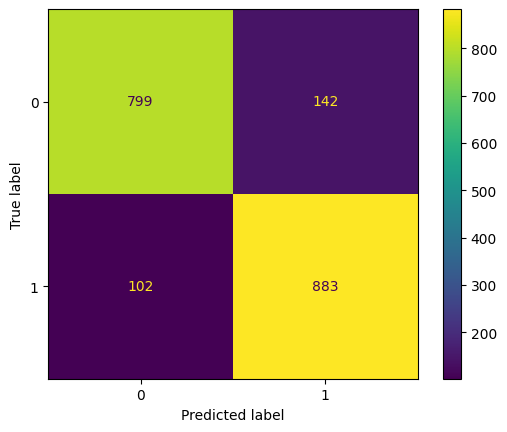

In [45]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_tuned),display_labels=model.classes_).plot()
plt.show()

The model have predicted 799 Fake news as `'Fake'` and 883 Real news as `'Real'`

So the model have made:
1. 1682 correct predictions
2. 244 incorrect predictions

### Conclusion

Let's take a random news and let's see how whether our model is able to find whether it is real or fake

In [57]:
news = '''As schools reopen for in-person learning, parents and educators are expressing concerns about COVID-19 transmission among unvaccinated children.
 Some schools are implementing mask mandates and testing programs to mitigate risks while prioritizing the educational needs of students, where most of them prefer online method.'''
parsed_news = parser(news)
transformed_news = tf.fit_transform([parsed_news])
print('Real News!') if tuned_model.predict(transformed_news) == 1 else print('Fake News')

Real News!


As we can see that the model performs the correct prediction and finds the news to be real.